# Setup And Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  Install Dependencies and Setup

In [3]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [4]:
# !pip list

In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove dodgy images

In [7]:
import cv2
import imghdr
from matplotlib import pylab as plt
import numpy as np

<ipython-input-7-c7353ee651c2>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'drive/MyDrive/data'

In [9]:
os.listdir(data_dir)

['sad', 'happy', '.ipynb_checkpoints']

In [10]:
os.path.join(data_dir, 'happy')

'drive/MyDrive/data/happy'

In [11]:
img = os.listdir(os.path.join(data_dir, 'happy'))
img

['07-120104-happy_people_are_not_nice_people.jpg',
 'image4.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images25.jpg',
 'images29.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'habits-of-happy-people-cr3.jpg',
 'happy-girl-in-leaves.jpg',
 'images7.jpg',
 'images3.jpg',
 'images32.jpg',
 'physed-happiness-facebookJumbo.jpg',
 'image24.jpeg',
 'image.jpeg',
 '1902539.jpg',
 'getty_494581822_130796.jpg',
 'maxresdefault.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'image7.jpeg',
 'brady-bunch-3.jpg',
 'images16.jpg',
 'traitshappypeople.jpg',
 'images31.jpg',
 'images2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'images13.jpg',
 'image23.jpeg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'images14.jpg',
 'image2.jpeg',
 'happy-people-vector-29209040.jpg',
 'happy-people-1024x768.jpeg',
 'images26.jpg',
 'group-of-happy-people-2.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '1000_F_42220133_toAU6USGY9jVr

In [12]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [13]:
for image_dir in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_dir)):
        image_path = os.path.join(data_dir, image_dir, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir) # to split data to images and labels

Found 305 files belonging to 2 classes.


In [15]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7cc5fbe8ff90>)

In [18]:
# get another batch from iterator
batch = data_iterator.next()

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
# class 0 => happy people
# class 1 => sad people
batch[1]  # labels

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int32)

In [21]:
# batch[0] # images

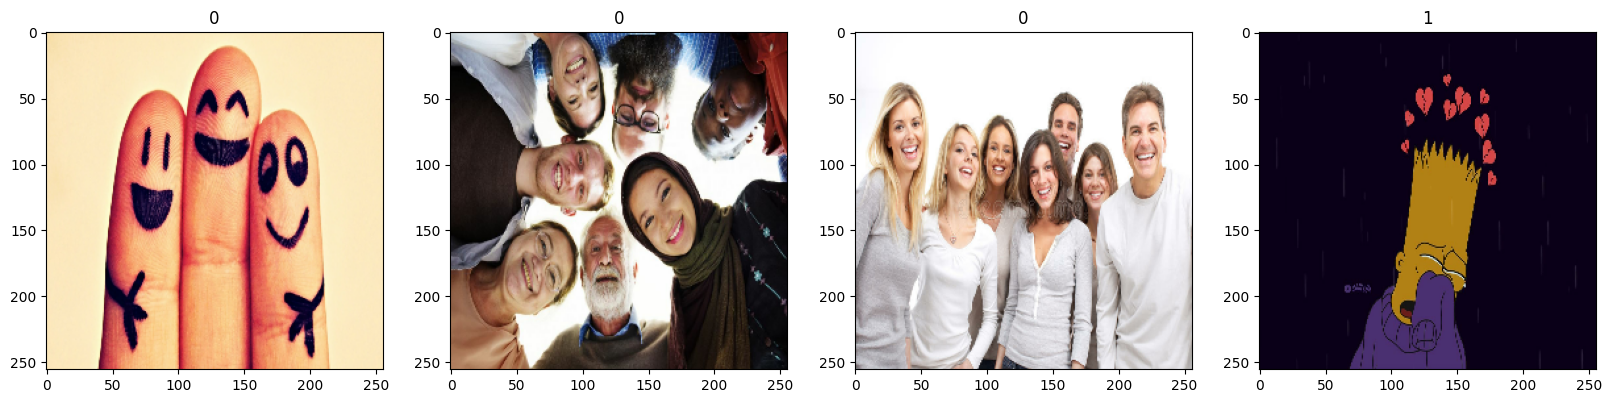

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


# Preprocess Data

## Scale Data

In [23]:
data = data.map(lambda x, y: (x/255, y))

In [24]:
scaled_iterator = data.as_numpy_iterator()

In [25]:
batch = scaled_iterator.next()

In [26]:
batch[0].max()

np.float32(1.0)

In [27]:
batch[0].min()

np.float32(0.0)

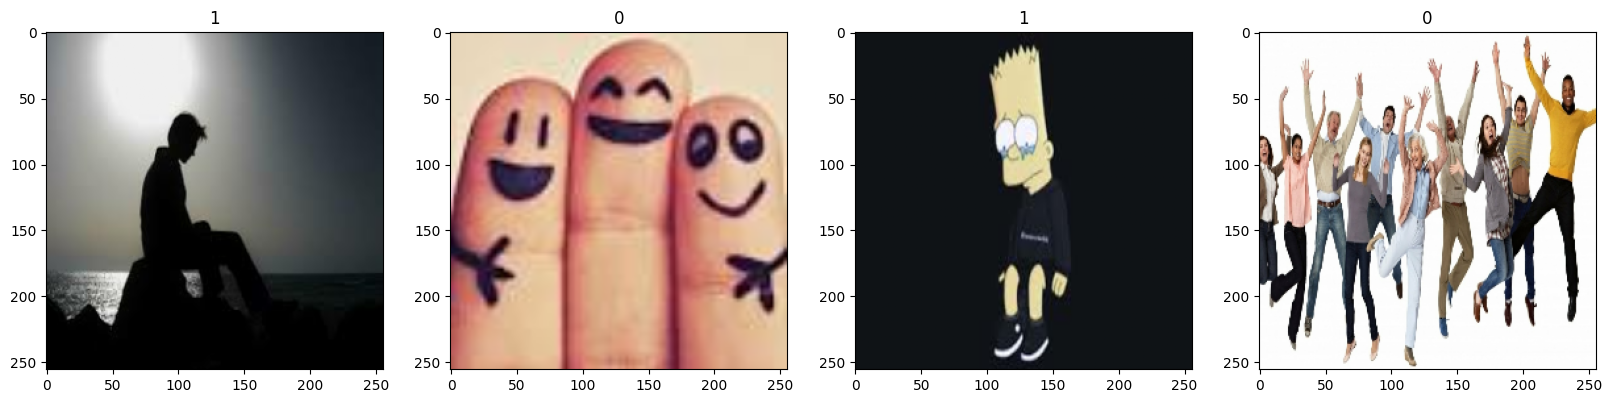

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## Split Data

In [29]:
len(data)

10

In [30]:
len(batch[0]) # every batch has 32 image

32

In [31]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [32]:
train_size # 7 batches => 7 * 32

7

In [33]:
val_size # 2 batches => 2 * 32

2

In [34]:
test_size # 1 batche => 1 * 32

1

In [35]:
train_size + val_size + test_size

10

In [36]:
# Shuffle Data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [37]:
len(test)

1

# Deep Model

## Build Deep Learning Model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [43]:
logdir = 'drive/MyDrive/logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 613ms/step - accuracy: 0.5234 - loss: 1.3282 - val_accuracy: 0.4844 - val_loss: 0.6908
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6448 - loss: 0.6209 - val_accuracy: 0.8750 - val_loss: 0.5731
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 736ms/step - accuracy: 0.8017 - loss: 0.5825 - val_accuracy: 0.8281 - val_loss: 0.5378
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 875ms/step - accuracy: 0.8407 - loss: 0.5052 - val_accuracy: 0.8906 - val_loss: 0.4866
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 676ms/step - accuracy: 0.8133 - loss: 0.4686 - val_accuracy: 0.7188 - val_loss: 0.4148
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 684ms/step - accuracy: 0.8262 - loss: 0.3319 - val_accuracy: 0.9062 - val_loss: 0.2283
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 794ms/step - accuracy: 0.8677 - loss: 0.3032 - val_accuracy: 0.9688 - val_loss: 0.1431
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 751ms/step - accuracy: 0.9553 - loss: 0.1914 - val_accuracy: 1.0000 - val_loss: 0

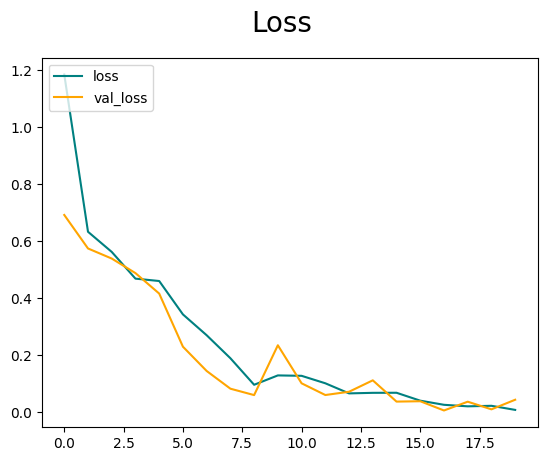

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

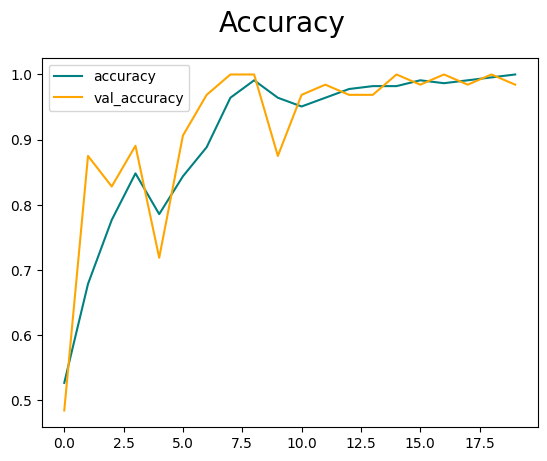

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


In [51]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## Test

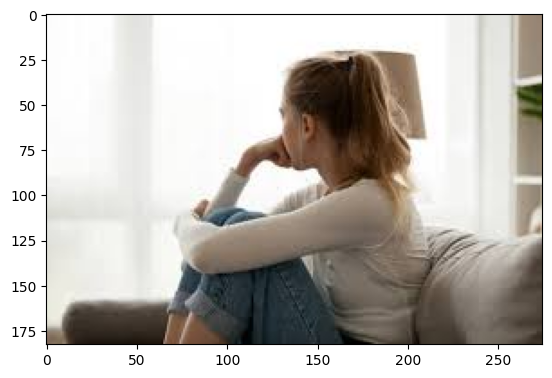

In [59]:
img = cv2.imread('drive/MyDrive/sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

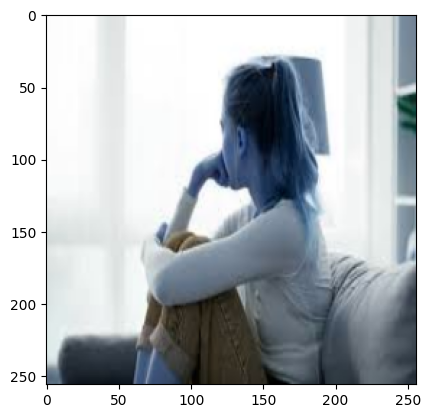

In [60]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
resize.shape

TensorShape([256, 256, 3])

In [62]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [64]:
yhat

array([[0.9850583]], dtype=float32)

In [79]:
if yhat > 0.5:
  print("Predicted class is Sad")
else:
  print("Predicted class is Happy")

Predicted class is Sad


## Save Model

In [66]:
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('drive/MyDrive/models', 'happySadModel.h5'))

## Load Model

In [75]:
newModel = load_model(os.path.join('drive/MyDrive/models', 'happySadModel.h5'))

In [76]:
yhatNew = newModel.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


In [78]:
if yhat > 0.5:
  print("Predicted class is Sad")
else:
  print("Predicted class is Happy")

Predicted Class is Sad
